In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# load the dataset
path = '/home/batman/Desktop/py/cybersecurity-jina/data/small_result230.csv'
df = read_csv(path)
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

/home/batman/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [3]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
15096,80,6,1.519356e+09,46,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15097,80,6,1.519383e+09,277,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15098,80,6,1.519381e+09,331,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15099,80,6,1.519355e+09,313,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15100,80,6,1.519383e+09,190,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [4]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [5]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [6]:
# define the  model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, batch_size=16, epochs=50, shuffle=True, verbose=2, validation_data=(X_test,y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()

Epoch 1/50
633/633 - 3s - loss: 11476860.0000 - accuracy: 0.9149 - val_loss: 830216.9375 - val_accuracy: 0.9709 - 3s/epoch - 4ms/step
Epoch 2/50
633/633 - 2s - loss: 529576.6250 - accuracy: 0.9486 - val_loss: 1381301.3750 - val_accuracy: 0.9617 - 2s/epoch - 3ms/step
Epoch 3/50
633/633 - 2s - loss: 487141.0000 - accuracy: 0.9516 - val_loss: 657474.6250 - val_accuracy: 0.9703 - 2s/epoch - 3ms/step
Epoch 4/50
633/633 - 2s - loss: 619680.3750 - accuracy: 0.9514 - val_loss: 414433.6875 - val_accuracy: 0.9781 - 2s/epoch - 2ms/step
Epoch 5/50
633/633 - 2s - loss: 671219.6250 - accuracy: 0.9524 - val_loss: 1543040.8750 - val_accuracy: 0.3451 - 2s/epoch - 2ms/step
Epoch 6/50
633/633 - 2s - loss: 581283.5000 - accuracy: 0.9547 - val_loss: 492717.6562 - val_accuracy: 0.9707 - 2s/epoch - 2ms/step
Epoch 7/50
633/633 - 2s - loss: 561995.6875 - accuracy: 0.9569 - val_loss: 385967.0938 - val_accuracy: 0.9781 - 2s/epoch - 2ms/step
Epoch 8/50
633/633 - 2s - loss: 545063.6875 - accuracy: 0.9577 - val_los

156/156 [==============================] - 0s 2ms/step


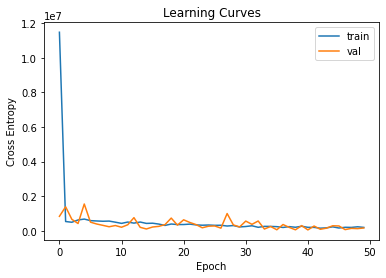

In [21]:
# predict test set
yhat = model.predict(X_test)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [22]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Accuracy: 0.974318
Precision: 0.740458
Recall: 0.507853
F1 score: 0.602484


In [23]:
X_test.shape

(4984, 79)

In [24]:
X_test[0].shape

(79,)

In [25]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 31ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [26]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [27]:
NUM_TO_CONSIDER = 10
correct = 0
for got, expected in zip(model.predict(X_test[:NUM_TO_CONSIDER]), y_test[:NUM_TO_CONSIDER]):
    if int(got[0]) == int(expected):
        print(f"correct: {int(got[0])} == {int(expected)}")
        correct += 1

total_score = correct / NUM_TO_CONSIDER
print(f"total score: {total_score}")


1/1 [==============================] - 0s 30ms/step
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 1 == 1
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
total score: 1.0


In [28]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519349387.0,56705690,203,104,56083,189900,680,0,276.2709359606,291.6989844299,1935,0,1825.9615384615,320.3787783439,4337.8891959519,5.4139187796,185312.712418301,362882.704589828,1014075,25,56703383,280709.816831683,415824.191561832,1014075,440,56705665,550540.436893204,440061.419389244,1016698,36,0,0,0,0,4072,2092,3.5798876621,1.8340311175,0,1935,798.6461038961,794.0143633481,630458.809203012,0,0,1,1,0,0,0,1,0,801.2475570033,276.2709359606,1825.9615384615,0,0,0,0,0,0,203,56083,104,189900,8192,1281,101,20,0,0,0,0,0,0,0,0] # known_attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 57ms/step


1.0

In [29]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519348465.0,132,3,0,0,0,0,0,0,0,0,0,0,0,0,22727.2727272727,66,84.8528137424,126,6,132,66,84.8528137424,126,6,0,0,0,0,0,0,0,0,0,60,0,22727.2727272727,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2053,-1,0,20,0,0,0,0,0,0,0,0] # known attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 50ms/step


0.0

In [30]:
from tensorflow import keras
from tensorflow.keras.models import Model

In [31]:
model.summary() # before

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10240     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [35]:
model = Model(inputs=model.input, outputs=model.get_layer("dense").output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 79)]              0         
                                                                 
 dense (Dense)               (None, 128)               10240     
                                                                 
Total params: 10,240
Trainable params: 10,240
Non-trainable params: 0
_________________________________________________________________


In [64]:
from docarray import Document, DocumentArray


preds = model.predict(X_test)

embeddings = []
labels = []
for p, label in zip(preds[:100], y_test[:100]):
    embeddings.append(p)
    labels.append(label)

embeddings_df = pd.DataFrame({"predictions" : embeddings, "labels" : labels})
embeddings_df.head()

156/156 [==============================] - 0s 3ms/step


,predictions,labels
0,"[0.0, 208538860.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.0
1,"[0.0, 241191550.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.0
2,"[0.0, 209300110.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.0
3,"[0.0, 276558660.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.0
4,"[0.0, 273834780.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",0.0


In [82]:
index = DocumentArray()
for i in range(len(embeddings_df)):
    d = Document(
        embedding=np.array(embeddings_df.iloc[i, 0].tolist()), 
        tags={
            "known_label" : embeddings_df.loc[i, "labels"],
        }
    )
    index.append(d)
index.summary()

╭────────────────── Documents Summary ───────────────────╮
│                                                        │
│   Length                 100                           │
│   Homogenous Documents   True                          │
│   Common Attributes      ('id', 'tags', 'embedding')   │
│   Multimodal dataclass   False                         │
│                                                        │
╰────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   100              False             │
│   id          ('str',)       100              False             │
│   tags        ('dict',)      100              False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [83]:
from docarray import Document, DocumentArray
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

old_index = DocumentArray.load("/home/batman/Desktop/py/cybersecurity-jina/index")
index.match(old_index, exclude_self=True)
index.summary()

╭───────────────────────── Documents Summary ──────────────────────────╮
│                                                                      │
│   Length                    100                                      │
│   Homogenous Documents      True                                     │
│   Has nested Documents in   ('matches',)                             │
│   Common Attributes         ('id', 'tags', 'embedding', 'matches')   │
│   Multimodal dataclass      False                                    │
│                                                                      │
╰──────────────────────────────────────────────────────────────────────╯
╭──────────────────────── Attributes Summary ────────────────────────╮
│                                                                    │
│   Attribute   Data type         #Unique values   Has empty value   │
│  ────────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)      100              False             │
│   id          ('str',)          100              False             │
│   matches     ('MatchArray',)   100              False             │
│   tags        ('dict',)         100              False             │
│                                                                    │
╰────────────────────────────────────────────────────────────────────╯

In [84]:

y_test = [] # expected
yhat = [] # "predictions" aka nearest neighbor/brute force

for doc in index:
    # known
    if doc.tags.get("known_label") == 0.0:
        y_test.append(0.0)
    else:
        y_test.append(1.0)
    
    # these are nearest neighbor/brute force which is basically the "prediction" since we have embeddings stored in vector space as opposed to a forward pass through neural network or something
    if doc.matches[0].tags.get("known_label") == 0.0:
        yhat.append(0.0)
    else:
        yhat.append(1.0)


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Accuracy: 0.960000
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/home/batman/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
preds_out = model.predict(X_test[:100])
preds_out.shape

4/4 [==============================] - 0s 3ms/step


(100, 128)

# vectors are 128-D now (as opposed to 79 from before)

In [ ]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
X_test[0].shape # old shape

(79,)

In [ ]:
preds[0].shape # new shape

(128,)

In [ ]:
import pandas as pd


df = pd.read_csv("/Users/peppermint/Desktop/codes/python/NetworkIntrusionDetection/Datasets/small_result230.csv")
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [ ]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [ ]:
X_only = df.iloc[:, :-1].astype("float32")
y_only = df.iloc[:, -1].astype("float32")
y_only

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15096    1.0
15097    1.0
15098    1.0
15099    1.0
15100    1.0
Name: Label, Length: 15101, dtype: float32

In [ ]:
res = model.predict(X_only)
res.shape

472/472 [==============================] - 1s 2ms/step


(15101, 128)

In [ ]:
embeddings_df = pd.DataFrame(res)
embeddings_df["Label"] = y_only
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,87461240.0,0.0,0.0,164995264.0,0.0,0.0,7681.36084,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,86973384.0,0.0,0.0,164680752.0,0.0,0.0,86395.34375,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109418888.0,0.0,0.0,168141408.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,87888144.0,0.0,0.0,165473328.0,0.0,0.0,441820.96875,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88171776.0,0.0,0.0,165785136.0,0.0,0.0,713556.62500,0.0,0.0


In [ ]:
# embeddings_df.to_csv("embeddings_df.csv", index=0)

In [ ]:
result = pd.concat([embeddings_df, df], axis=1)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
result = result.sample(frac=1, random_state=0)
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
10799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
2732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,86239131.0,0.0,86239131,86239131,0


In [ ]:
import random
import time
from datetime import datetime
dates = []
def randomDate(start, end):
    frmt = '%d-%m-%Y %H:%M:%S'

    stime = time.mktime(time.strptime(start, frmt))
    etime = time.mktime(time.strptime(end, frmt))

    ptime = stime + random.random() * (etime - stime)
    dt = datetime.fromtimestamp(time.mktime(time.localtime(ptime)))
    return dt

for i in range(0 , len(result)):
    dates.append(randomDate("20-01-2018 13:30:00", "23-01-2018 04:50:34"))
dates

[datetime.datetime(2018, 1, 21, 19, 48, 23),
 datetime.datetime(2018, 1, 21, 8, 36, 32),
 datetime.datetime(2018, 1, 20, 20, 31, 46),
 datetime.datetime(2018, 1, 21, 4, 35, 54),
 datetime.datetime(2018, 1, 22, 0, 54, 48),
 datetime.datetime(2018, 1, 20, 14, 8, 35),
 datetime.datetime(2018, 1, 21, 18, 6, 8),
 datetime.datetime(2018, 1, 23, 3, 35, 12),
 datetime.datetime(2018, 1, 22, 14, 11, 57),
 datetime.datetime(2018, 1, 21, 1, 53, 56),
 datetime.datetime(2018, 1, 21, 9, 0, 18),
 datetime.datetime(2018, 1, 22, 4, 19, 18),
 datetime.datetime(2018, 1, 21, 2, 55, 23),
 datetime.datetime(2018, 1, 22, 18, 33, 33),
 datetime.datetime(2018, 1, 21, 4, 58, 41),
 datetime.datetime(2018, 1, 21, 8, 33, 56),
 datetime.datetime(2018, 1, 20, 19, 15, 6),
 datetime.datetime(2018, 1, 22, 7, 27, 10),
 datetime.datetime(2018, 1, 21, 2, 47, 53),
 datetime.datetime(2018, 1, 22, 1, 7, 17),
 datetime.datetime(2018, 1, 20, 13, 46, 16),
 datetime.datetime(2018, 1, 21, 7, 1, 47),
 datetime.datetime(2018, 1, 21,

In [ ]:
result.insert(loc=len(result.columns)-1, column='dt', value=dates)
result.head(2)


,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
13002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-21 19:48:23,0
8137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,86075433.0,0.0,86075433,86075433,2018-01-21 08:36:32,0


In [ ]:
result.sort_values(by="dt", inplace=True)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:11,0
5789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,86574190.0,0.0,86574190,86574190,2018-01-20 13:30:18,0


In [ ]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
1361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:49:58,0
4362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:27,0


In [ ]:
result.iloc[:, :128].head(2)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57801.949219,0.0,88252592.0,0.0,0.0,165605168.0,0.0,0.0,314195.59375,0.0
5789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,102739480.0,0.0,0.0,244318944.0,0.0,0.0,0.00000,0.0


In [ ]:
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:11,0
5789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,86574190.0,0.0,86574190,86574190,2018-01-20 13:30:18,0


In [ ]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
1361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:49:58,0
4362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:27,0


In [ ]:
# result.to_csv("embeddings_df_with_details.csv", index=0)

## in app

In [ ]:
from jina import Document, DocumentArray

In [ ]:
da = DocumentArray.load("index")
da.summary()

╭────────────────── Documents Summary ───────────────────╮
│                                                        │
│   Length                 15101                         │
│   Homogenous Documents   True                          │
│   Common Attributes      ('id', 'tags', 'embedding')   │
│                                                        │
╰────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   15101            False             │
│   id          ('str',)       15101            False             │
│   tags        ('dict',)      15101            False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [ ]:
da_df = da.to_dataframe()
da_df.head(2)

,id,parent_id,granularity,adjacency,blob,tensor,mime_type,text,weight,uri,tags,offset,location,embedding,modality,evaluations,scores,chunks,matches
0,cc411bdfc4a36bd2bcc316b504848aec,None,None,None,None,None,None,None,None,None,"{'dt': '2018-01-20 13:30:11', 'port': 445.0, '...",None,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None
1,46098a817497d0b1e9720e721086462f,None,None,None,None,None,None,None,None,None,"{'known_label': 0.0, 'dt': '2018-01-20 13:30:1...",None,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None
